## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

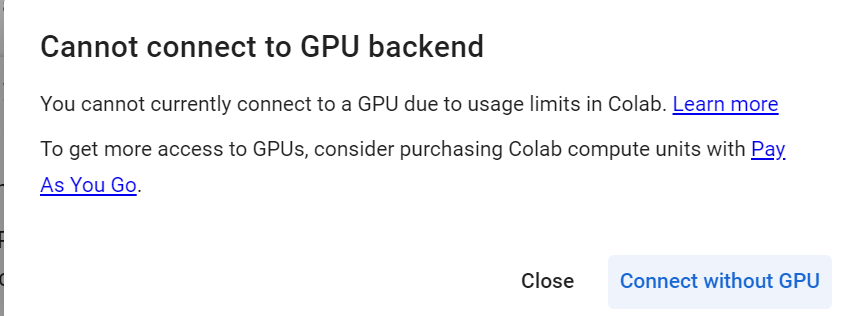

## **Installing and Importing Necessary Libraries**

In [1]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:
!pip install --force-reinstall numpy==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.


In [2]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# loading data into a pandas dataframe
stocks = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stock_news.csv")

Mounted at /content/drive


In [4]:
# creating a copy of the data
data = stocks.copy()

## **Data Overview**

In [ ]:
# Displaying top 5 rows of the dataset
data.head(5)

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
# Checking Shape of dataset
data.shape

(349, 8)

The data set has 349 rows and 8 colums

In [ ]:
# Checking for missing values
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


There are no missing values in the dataset

In [ ]:
# Checking for duplicate values
data.duplicated().sum()

0

There are no duplicate values in the dataset

In [ ]:
# Checking data types of the columns
data.dtypes

,0
Date,object
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


In [5]:
# Convert the 'Date' column in the 'data' DataFrame to datetime format.
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Checking the statistical summary
data.describe(include='number').T.round(2)

,count,mean,std,min,25%,50%,75%,max
Open,349.0,4.623000e+01,6.44,37.57,4.174000e+01,4.597000e+01,5.071000e+01,6.682000e+01
High,349.0,4.670000e+01,6.51,37.82,4.224000e+01,4.603000e+01,5.085000e+01,6.706000e+01
Low,349.0,4.575000e+01,6.39,37.30,4.148000e+01,4.564000e+01,4.978000e+01,6.586000e+01
Close,349.0,4.493000e+01,6.40,36.25,4.025000e+01,4.460000e+01,4.911000e+01,6.481000e+01
Volume,349.0,1.289482e+08,43170314.92,45448000.00,1.032720e+08,1.156272e+08,1.511252e+08,2.444392e+08
Label,349.0,-5.000000e-02,0.72,-1.00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


1. The statistical description for Label column does not provide meaningful insights.  
2. The Open stock value ranges between \$37.57 and \$66.82 and has an average value of \$46.23
3. The High stock value ranges between \$37.82 and \$67.06 and has an average value of \$46.70
4. The Low stock value ranges between \$37.30 and \$66.82 and has an average value of \$45.75
5. The Close stock value ranges between \$36.25 and \$64.81 and has an average value of \$44.93
6. On an average 1.3e+08 stocks are traded in a day

## **Exploratory Data Analysis**

### Univariate Analysis

Observations on Label

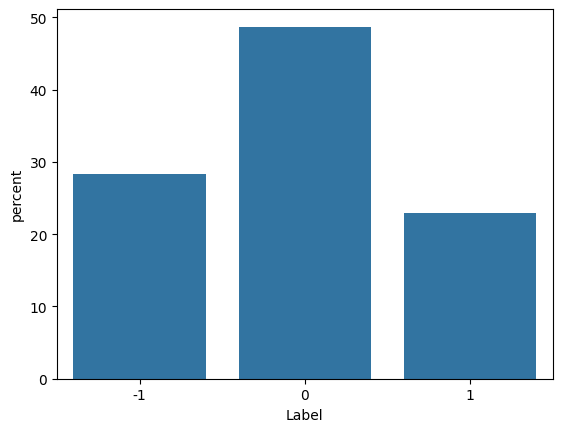

In [ ]:
sns.countplot(data=data, x="Label", stat="percent");

1. The dataset is imbalanced.
2. 48% of the news belongs to the Neutral group
3. 28% of the news belongs to Negative category
4. 24% of the news belongs to Positive category

Density Plot of Price (Open,High,Low,Close)

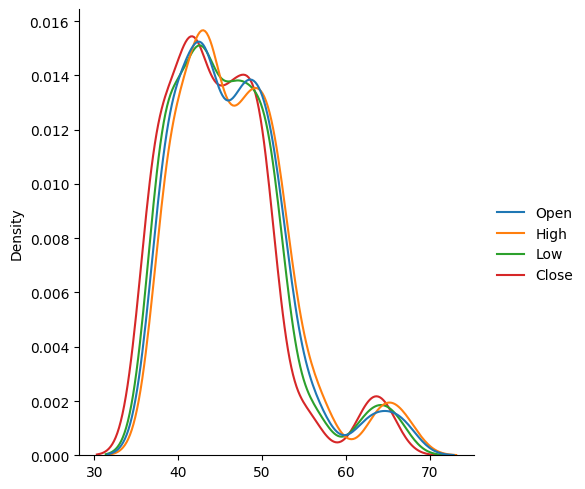

In [ ]:
# Plot a density plot of ["Open","High","Low","Close"] all in a single plot
sns.displot(data=data[["Open","High","Low","Close"]], kind="kde", palette="tab10");

1. The stock values show a bi-modal distribution
2. The first peak is steep and concentrated at \$39-\$42.
3. The second peak is smaller and flatter at \$63-\$66.
4. There is dip between the two peaks at \$59-\$61.
5. Very few stocks are traded below \$32 and above \$70.


Observations on Volume

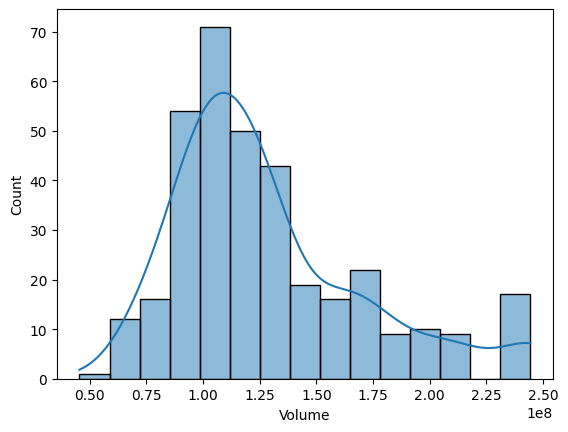

In [ ]:
# Complete the code to plot a histogram of Volume
sns.histplot(data, x='Volume', kde=True);

1. Distribution is slightly right skewed
2. Most of stocks see a large volume of trade
3. The trade hit 100M for 70 stocks
4. Very few stocks are traded less than 50M
5. Few stocks have seen very large volume of trade say, 250M
6. Skewness in the data is an indication that few stocks are traded more compared to others

Observations on News length

In [8]:
# Calculating the total number of words present in the news content.
data['news_len'] = data['News'].apply(lambda x: len(x.split(' ')))

In [ ]:
# Complete the code to print the statistical summary for the news content length
data['news_len'].describe().T.round(2)

,news_len
count,349.00
mean,49.31
std,5.73
min,19.00
25%,46.00
50%,50.00
75%,53.00
max,61.00


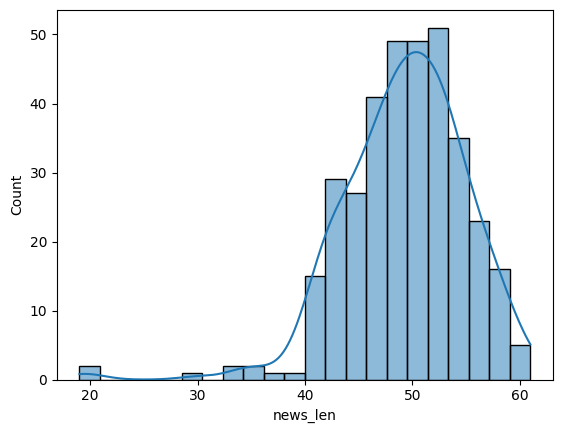

In [ ]:
# Complete the code to plot a histogram of news_len column
sns.histplot(data=data,x=data['news_len'],kde=True);

1. Distribution is slightly left skewed
2. The skewness indicates that most of the articles are elaborate enough compared to few that are very short articles like headlines or news summaries
3. Most of the articles have 40-60 words
4. The shortest article has 20 words
5. Longest artivle has 55 words
6. A normal curve between 40-60 indicate a standard news content length

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

Correlation

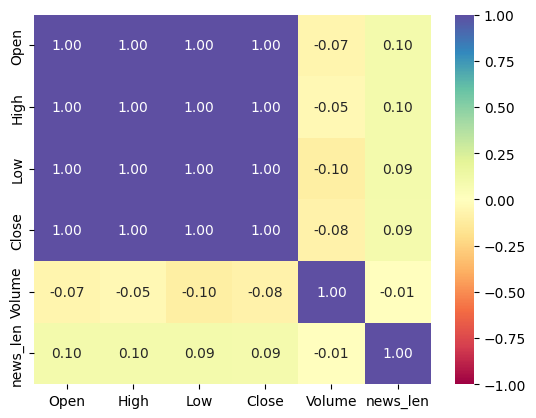

In [9]:
#Complete the code to plot the correlation matrix for numeric columns only.
sns.heatmap(
    data[['Open', 'High', 'Low', 'Close', 'Volume', 'news_len']].corr(),
    annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

Observations
1. The price metrices are highly correlated with each other
2. Volume is negatively correlated with all price related variables
3. Negative correlation between volume and the price metrices indicate that the trade volume increases when the price decreases
4. news_len has very low to no relation with other variables

Label vs Price (Open, High, Low, Close)

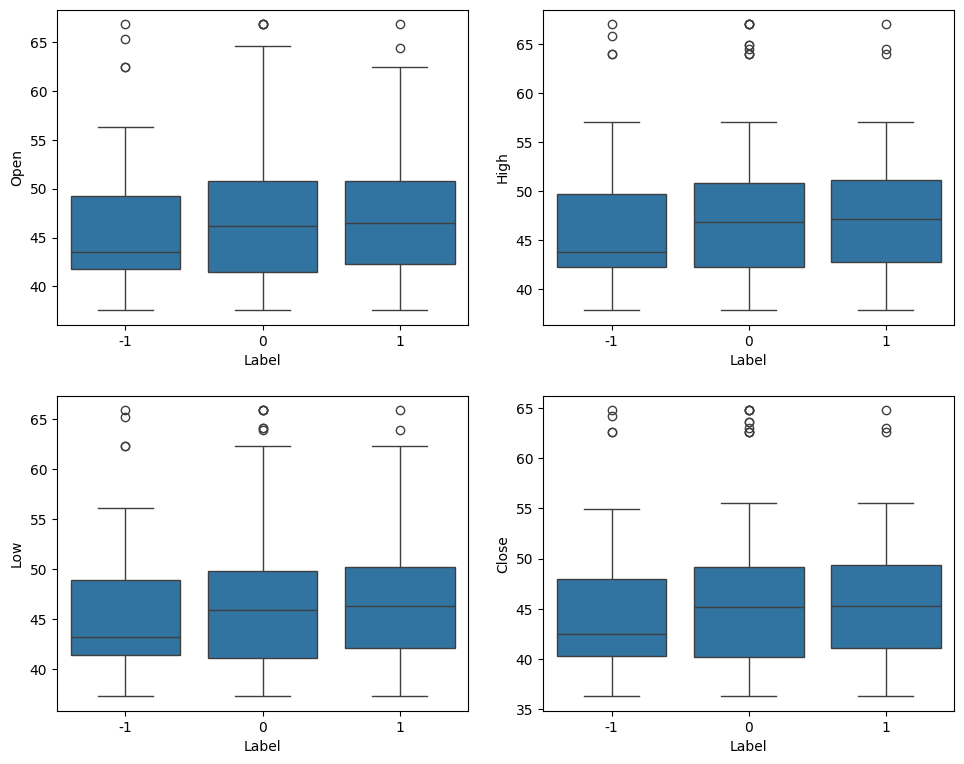

In [ ]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

Observations
1. All price metrics (Open, High, Low, Close) show similar distribution across sentiments
2. Each plot shows outliers around \$65-\$67.
3. Most of the prices fall between \$40-\$50 across sentiment categories
4. Positive sentiment shows highest median prices
5. Negative sentiment shows lowest median prices
6. Neutral sentiment median price falls between above
7. All sentiment plots show consistent outliers at higher prices

The relationship between sentiment and price exists, but is weak
Positive sentiment leads to higher prices and vice versa

Label vs Volume

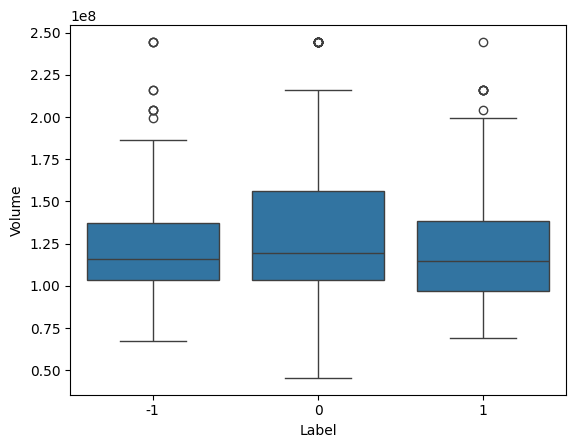

In [ ]:
sns.boxplot(
    data=data, x="Label", y="Volume"  # Complete the code to plot a boxplot of Label vs Volume
);

Observations
1. Plot spread is highest for Neutral sentiment
2. Plot spread is similar for positive and negative sentiment
3. All categories have outliers around 225-250M shares
4. Most trading volumes are between 75-175M
5. Minimum trading volumes are from 50-75M

This indicates that relationship between news sentiment and trading volume is weak, with neutral sentiment showing the most volume variability.

Date vs Price (Open, High, Low, Close)

In [ ]:
stock_daily = data.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


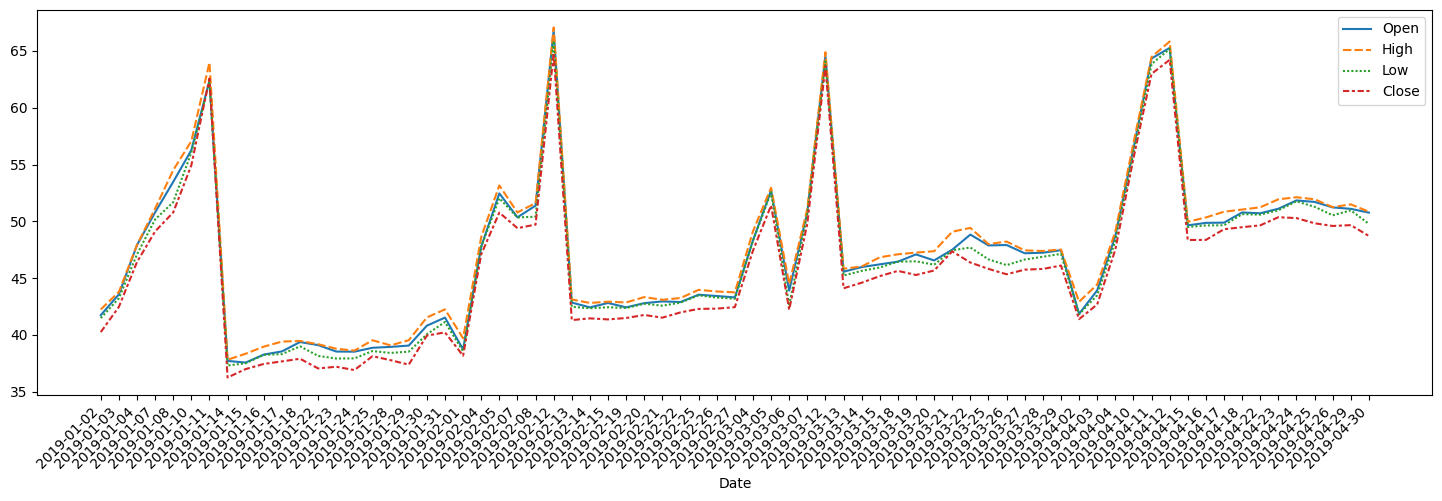

In [ ]:
plt.figure(figsize=(18,5))
sns.lineplot(stock_daily.drop("Volume", axis=1)); #Complete the code to plot a lineplot of all the variables except Volume
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels by 45 degrees
plt.show() #To display the plot

Observations
1. There are Four major price peaks:
  1.1. Mid-January (\$63).
  1.2. Mid-February (\$67).
  1.3. Early March (\$65).
  1.4. Early April (\$65).

2. All price metrics are in sync
3. Rises and valleys in the prices are consistent over the 4 months
4. The prices are gradually increasing month after month
5. There is roughly a 2 week gap between a peak and consecutive dip

Volume vs Close Price

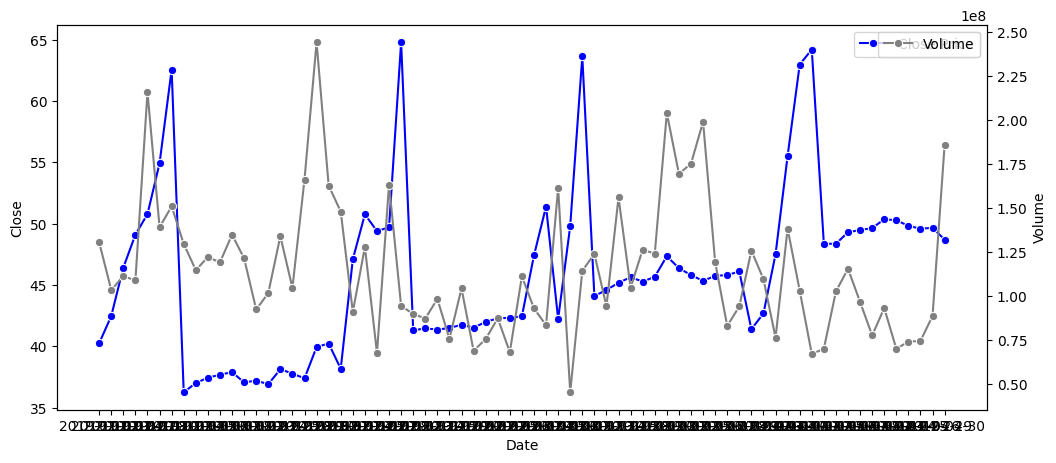

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

Observations

1. Peak price hikes and Volume hikes are inversely proportional
2. Volume peaks are around 200-250M
3. Peak Close prices are around \$60
4. Volume spikes are generally short-lived (1-2 days). When the price reverses, the volume drops
5. Late April shows more consistent volume with stable prices

## **Data Preprocessing**

In [ ]:
# Code to print the statistical summary of the 'Date' column
data["Date"].describe()

,Date
count,349
unique,71
top,2019-01-03
freq,28


Max occurence is for date 1/3 for 28 times in the dataset

Train-test-validation Split

In [6]:
X_train = data[(data['Date'] < '2019-04-01')].reset_index()    #Complete the code to select all rows where the 'Date' is before '2019-04-01'
X_val = data[(data['Date'] >= '2019-04-01') & (data['Date'] < '2019-04-16')].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-01 to '2019-04-16' (excluded)
X_test = data[data['Date'] >= '2019-04-16'].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-16' till the end

In [7]:
# Complete the code to pick the 'Label' column as the target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

#Complete the code to print the shape of X_train,X_val,X_test,y_train,y_val and y_test
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 9)
Validation data shape (21, 9)
Test data shape  (42, 9)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


## **Word Embeddings**

Word2Vec

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in data['News'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


Let's check out a few word embeddings obtained using the model.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([ 0.00308731,  0.04392966,  0.00540884,  0.02404228, -0.00304567,
       -0.05071489,  0.03530844,  0.08432288,  0.00966623, -0.01541624,
        0.01161093, -0.02226689,  0.00131545,  0.01204488, -0.02932471,
       -0.02540187,  0.0208891 , -0.01248715, -0.00226814, -0.01347937,
       -0.02681002,  0.00286941,  0.03712505,  0.00745186,  0.01475514,
        0.00600368, -0.04419374,  0.00638928, -0.01831898, -0.03539789,
        0.01395795, -0.02153818,  0.00347595, -0.00284629, -0.00472661,
        0.01691118,  0.01714026, -0.03838809,  0.0019428 , -0.01066516,
       -0.01624408, -0.00166579, -0.00170104, -0.0264033 ,  0.01587566,
        0.04008549,  0.00024513,  0.01056345, -0.00183796,  0.02720262,
        0.02024735,  0.00515834, -0.01636135,  0.01301701, -0.0107579 ,
        0.02750956,  0.01352696,  0.00367406,  0.01591009, -0.00476982,
       -0.00672848, -0.01613731, -0.000151  ,  0.01079702,  0.00649897,
        0.01452271,  0.00181445,  0.01470849, -0.02272898, -0.00

In [ ]:
# Checking the word embedding of a random word
word = "economy"
model_W2V.wv[word]

array([-9.68337932e-04,  5.36868162e-03,  3.14553850e-03,  1.92898419e-03,
       -1.13927829e-03, -1.12933619e-02,  6.72278600e-03,  1.57114528e-02,
       -2.01229681e-03, -2.25410587e-03, -2.52404576e-03, -3.50035564e-03,
        8.53898004e-04, -3.63694911e-04, -4.33562649e-03, -1.67856191e-03,
        7.18027866e-03,  1.85818330e-03,  3.60031007e-03, -2.74932897e-03,
       -5.89888822e-03,  2.67722458e-03,  3.85921402e-03, -8.36415682e-04,
        1.13734498e-03, -1.29527564e-03, -7.09691457e-03,  2.19226722e-03,
       -6.54125353e-03, -9.84180253e-03, -1.79866899e-03, -6.41894015e-03,
        2.78242840e-03, -2.89049023e-03, -2.67183105e-03,  6.02233363e-03,
       -1.08081949e-04, -5.39140869e-03, -1.63386198e-04, -3.02400696e-03,
       -5.58231398e-03,  8.99613427e-04,  1.48920703e-03, -3.81057081e-03,
        3.87342740e-03,  3.80118098e-03, -7.44448218e-04,  1.20184058e-03,
       -5.12905608e-05,  9.23791900e-04,  4.51369863e-03, -4.34766756e-03,
       -4.10184730e-03,  

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

In [ ]:
# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

In [ ]:
# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.9833331108093262


In [ ]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


GloVe

In [8]:
# load the Stanford GloVe model
filename = '/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [9]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


Let's check out a few word embeddings.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [10]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [11]:
vec_size=100

In [12]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [13]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column

end = time.time()
print('Time taken ', (end-start))

Time taken  38.124430656433105


In [14]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape) #Complete the code to print the shapes of the final dataframes

(286, 100) (21, 100) (42, 100)


Sentence Transformer

Defining the model

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Encoding the dataset

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# encoding the dataset
start = time.time()

In [ ]:
X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  13.865727663040161


In [ ]:
print(X_train_st.shape, X_val_st.shape, X_test_st.shape) #Complete the code to print the shapes of the final dataframes

(286, 384) (21, 384) (42, 384)


Each news content has been converted to a 384-dimensional vector.

## **Sentiment Analysis**

### Model Evaluation Criterion

F1 Score (f1_macro / f1_weighted) may be used as the evaluation criteria here due to the following reasons
1. F1 score is less sensitive to a data set that is too small and imbalanced
2. F1 score considers Precision and Recall which are a comprehensive view of the model's performance

### Utility Functions

In [15]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(3, 2))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [16]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

### Base Model - Word2Vec

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_wv, y_train)

RandomForestClassifier(random_state=42)

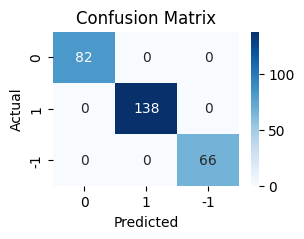

In [ ]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)

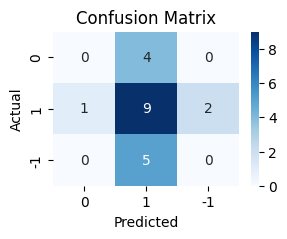

In [ ]:
plot_confusion_matrix(base_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.285714  0.342857


### Base Model - GloVe

In [ ]:
#Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_wv = GradientBoostingClassifier(random_state = 42)
base_gl = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_gl.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

RandomForestClassifier(random_state=42)

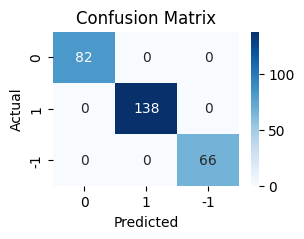

In [ ]:
plot_confusion_matrix(base_gl,X_train_gl,y_train) #Complete the code to plot the confusion matrix for the train data

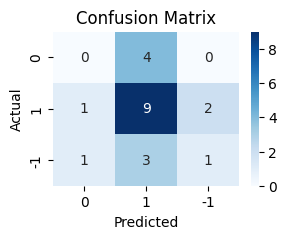

In [ ]:
plot_confusion_matrix(base_gl,X_val_gl,y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
base_train_gl=model_performance_classification_sklearn(base_gl,X_train_gl,y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n", base_train_gl)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_gl = model_performance_classification_sklearn(base_gl,X_val_gl,y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",base_val_gl)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619   0.400794  0.426871


### Base Model - Sentence Transformer

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data

#base_st = GradientBoostingClassifier(random_state = 42)
base_st = RandomForestClassifier(random_state=42)
#base_st = DecisionTreeClassifier(class_weight="balanced",random_state=42)

# Fitting on train data
base_st.fit(X_train_st, y_train) #Complete the code to fit the chosen model on the train data

RandomForestClassifier(random_state=42)

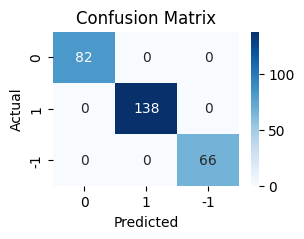

In [ ]:
plot_confusion_matrix(base_st,X_train_st,y_train) #Complete the code to plot the confusion matrix for the train data

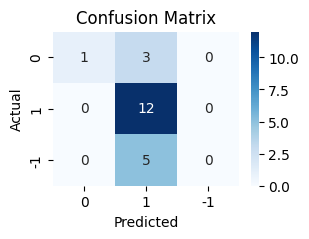

In [ ]:
plot_confusion_matrix(base_st,X_val_st,y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
base_train_st=model_performance_classification_sklearn(base_st,X_train_st,y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n", base_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_st = model_performance_classification_sklearn(base_st,X_val_st,y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",base_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.619048  0.619048   0.533333  0.504762


### Tuned Model - Word2Vec

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(class_weight="balanced",random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  162.3812050819397


In [ ]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.2,
                       min_samples_split=11, random_state=42)

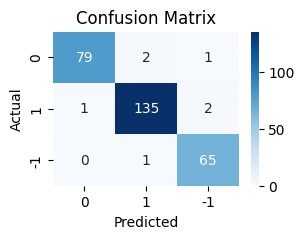

In [ ]:
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)

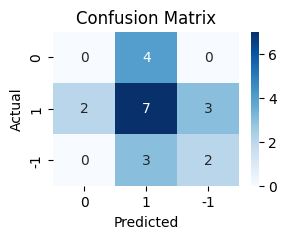

In [ ]:
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.975524  0.975524   0.975746  0.975543


In [ ]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n",tuned_val_wv)

Validation performance:
    Accuracy    Recall  Precision       F1
0  0.428571  0.428571   0.380952  0.40293


### Tuned Model - GloVe

In [17]:
start = time.time()

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_gl = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_gl, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  96.26486992835999


In [18]:
# Fit the best algorithm to the data.
tuned_gl.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=7,
                       random_state=42)

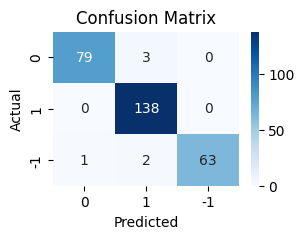

In [19]:
plot_confusion_matrix(tuned_gl,X_train_gl,y_train) #Complete the code to plot the confusion matrix for the train data

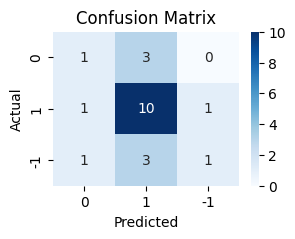

In [20]:
plot_confusion_matrix(tuned_gl,X_val_gl,y_val) #Complete the code to plot the confusion matrix for the validation data

In [21]:
#Calculating different metrics on training data
tuned_train_gl=model_performance_classification_sklearn(tuned_gl,X_train_gl,y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n",tuned_train_gl)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.979021  0.979021   0.979545  0.978968


In [22]:
#Calculating different metrics on validation data
tuned_val_gl = model_performance_classification_sklearn(tuned_gl,X_val_gl,y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",tuned_val_gl)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.571429  0.571429   0.539683  0.530612


### Tuned Model - Sentence Transformer

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corresponding to the base model trained previously

#tuned_st = GradientBoostingClassifier(random_state = 42)
tuned_st = RandomForestClassifier(class_weight="balanced",random_state=42)
#tuned_st = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4],
    'n_estimators': np.arange(30, 110, 10)
}

# Run the grid search
grid_obj = GridSearchCV(tuned_st, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Complete the code to pass the chosen model
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  954.0373277664185


In [ ]:
# Fit the best algorithm to the data.
tuned_st.fit(X_train_st, y_train) #Complete the code to fit the chosen model on the train data

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5, n_estimators=30, random_state=42)

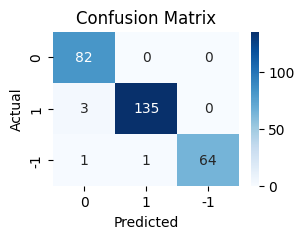

In [ ]:
plot_confusion_matrix(tuned_st,X_train_st,y_train) #Complete the code to plot the confusion matrix for the train data

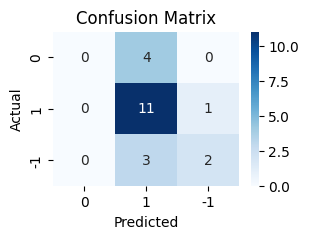

In [ ]:
plot_confusion_matrix(tuned_st,X_val_st,y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
tuned_train_st=model_performance_classification_sklearn(tuned_st,X_train_st,y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n",tuned_train_st)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.982517  0.982517   0.983117  0.982579


In [ ]:
#Calculating different metrics on validation data
tuned_val_st = model_performance_classification_sklearn(tuned_st,X_val_st,y_val) #Complete the code to compute the model performance for the validation data
print("Validation performance:\n",tuned_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.619048  0.619048   0.507937  0.538095


### Model Performance Summary and Final Model Selection

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

In [ ]:
#validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.428571,0.476190,0.619048,0.428571,0.571429,0.619048
Recall,0.428571,0.476190,0.619048,0.428571,0.571429,0.619048
Precision,0.285714,0.400794,0.533333,0.380952,0.539683,0.507937
F1,0.342857,0.426871,0.504762,0.402930,0.530612,0.538095


Observations

1. Based on the Validation dataset comparison, Base and Tuned Sentence Transformer show the highest metrics
2. The tuned GloVe model is lightly behind the sentence transformer in Acuracy and Recall, but the F1 score is comparable
3. Considering the fact that GloVe model is much light weight compared to Sentence transformer, we will pick the **Tuned GloVe Model** as the best model


Model Performance Check on Test Data

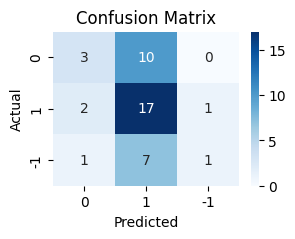

In [25]:
plot_confusion_matrix(tuned_gl,X_test_gl,y_test) #Complete the code to plot the confusion matrix for the final model and test data

In [26]:
#Calculating different metrics on training data
final_model_test = model_performance_classification_sklearn(tuned_gl,X_test_gl,y_test) #Complete the code to compute the final model's performance for the test data
print("Test performance for the final model:\n",final_model_test)

Test performance for the final model:
    Accuracy  Recall  Precision        F1
0       0.5     0.5        0.5  0.436529


Observations

1. The Tuned GloVe model is able to moderately generalize on the test data.
2. The Accuracy, Precision and Recall are at 50% which is not bad.
3. However, the F1 score went down to 43% compared to 53% in training set.
4. This indicates that the model is slightly overfitting and is not able to generalize well on unseen data

Possible improvements would be to
1. Fix the class imbalance in dataset
2. Augment the dataset to add more data
3. More Hyperparameter tuning

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [5]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DGGML_CUDA=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 123.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 197.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 273.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 218.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine

In [6]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [7]:
from google.colab import drive
drive.mount('/content/drive')
# loading data into a pandas dataframe
stock_news = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stock_news.csv")

Mounted at /content/drive


In [8]:
stock = stock_news.copy()

#### Loading the model

In [9]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

model_path = hf_hub_download(
    repo_id=model_name_or_path, # Complete the code to mention the repo_id
    filename=model_basename # Complete the code to mention the filename
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [10]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
# uncomment and run the following code in case GPU is not being used

# llm = Llama(
#     model_path=model_path,
#     n_ctx=4500, # Context window
#     n_cores=-2 # Number of CPU cores to use
# )

#### Aggregating the data weekly

In [11]:
stock["Date"] = pd.to_datetime(stock['Date'])  # Convert the 'Date' column to datetime format.

In [12]:
# Group the data by week using the 'Date' column.
weekly_grouped = stock.groupby(pd.Grouper(key='Date', freq='W'))

In [13]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [14]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [15]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [16]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [17]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=1024, #Complete the code to set the maximum number of tokens the model should generate for this task.
      temperature=0.01, #Complete the code to set the value for temperature.
      top_p=0.95, #Complete the code to set the value for top_p
      top_k=64, #Complete the code to set the value for top_k
      echo=False
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [18]:
news = data_1.loc[0, 'News']

In [18]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [19]:
updated_prompt = """

You are an expert financial analyst specializing in market sentiment analysis and news summarization for stock price prediction.

Task: Analyze the provided news articles for the week and identify the top three positive and negative events that are most likely to impact the price of the company's stock.

Instructions:
1. Carefully read all the provided news articles.
2. Identify key events and news related to the company, its industry, and the overall market.
3. Focus on events and news that could potentially influence investor sentiment and stock prices.
4. Categorize these events as either positive or negative based on their potential impact on the stock price.
5. Select the top three most significant positive events and the top three most significant negative events.
6. Summarize each event concisely, highlighting its potential impact on the stock price.

Output Format:
Return the output in JSON format with two main keys: "Positive Events" and "Negative Events."
Under each key, include three numbered entries, each containing a summary of a significant event.

Example:
{
  "Positive Events": {
    "1": "Company announced a new strategic partnership with a major industry player, potentially boosting its market share and revenue.",
    "2": "Positive clinical trial results for a new product were released, increasing investor confidence in the company's future prospects.",
    "3": "The company received an upgrade from a prominent financial analyst, signaling positive expectations for future performance."
  },
  "Negative Events": {
    "1": "A major competitor launched a similar product at a lower price, threatening the company's market share.",
    "2": "Concerns were raised about potential supply chain disruptions impacting the company's production.",
    "3": "The company reported lower-than-expected quarterly earnings, leading to investor disappointment and potential sell-off."
  }
}
"""

In [20]:
#Summarize one news with new prompt
%%time
summary = response_mistral_1(updated_prompt, news)
print(summary)

 {
          "Positive Events": {
            "1": "Roku Inc announced plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel. This follows Amazon's successful Channels business.",
            "2": "The Chinese central bank announced a fifth reduction in the required reserve ratio (RRR) for banks, freeing up approximately 116.5 billion yuan for new lending.",
            "3": "The stock market rebounded strongly on Friday following positive news about US-China trade talks, a better-than-expected jobs report, and dovish comments from Federal Reserve Chairman Jerome Powell."
          },
          "Negative Events": {
            "1": "Apple cut its quarterly revenue forecast for the first time in over 15 years due to weak iPhone sales in China, representing around 20% of Apple's revenue.",
            "2": "Investors withdrew a record $98 billion from U.S. stock funds in December, with fears of aggressive monetary policy and an

In [21]:
data_2 = data_1.copy()

Checking the model output on the weekly data

In [22]:
%%time
data_2['Key Events'] = data_2['News'].progress_apply(lambda x: response_mistral_1(updated_prompt,x))

100%|██████████| 18/18 [6:33:46<00:00, 1312.61s/it]

CPU times: user 6h 31min 17s, sys: 30.3 s, total: 6h 31min 47s
Wall time: 6h 33min 46s


In [23]:
print(data_2["Key Events"])

0      {\n          "Positive Events": {\n          ...
1      {\n          "Positive Events": {\n          ...
2      {\n          "Positive Events": {\n          ...
3      {\n          "Positive Events": {\n          ...
4      {\n          "Positive Events": {\n          ...
5      {\n          "Positive Events": {\n          ...
6      {\n          "Positive Events": {\n          ...
7      {\n          "Positive Events": {\n          ...
8      {\n        "Positive Events": {\n          "1...
9      {\n          "Positive Events": {\n          ...
10     {\n          "Positive Events": {\n          ...
11     {\n          "Positive Events": {\n          ...
12     {\n          "Positive Events": {\n          ...
13     {\n          "Positive Events": {\n          ...
14     {\n          "Positive Events": {\n          ...
15     {\n          "Positive Events": {\n          ...
16     {\n          "Positive Events": {\n          ...
17     {\n          "Positive Events": {\n      

Formatting the model output

In [24]:
data_2['model_response_parsed'] = data_2['Key Events'].apply(extract_json_data)
data_2

,Date,News,Key Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""Positive Events"": {\n ...",{'Positive Events': {'1': 'Roku Inc announced ...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""Positive Events"": {\n ...",{'Positive Events': {'1': 'Sprint and Samsung'...
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""Positive Events"": {\n ...",{'Positive Events': {'1': 'Dialog Semiconducto...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""Positive Events"": {\n ...",{'Positive Events': {'1': 'IBM reported better...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""Positive Events"": {\n ...",{'Positive Events': {'1': 'Apple reported stro...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an...","{\n ""Positive Events"": {\n ...",{'Positive Events': {'1': 'JPMorgan suggested ...
6,2019-02-17,"This week, the European Union's second highes...","{\n ""Positive Events"": {\n ...",{'Positive Events': {'1': 'Akamai Technologies...
7,2019-02-24,This news article discusses progress towards ...,"{\n ""Positive Events"": {\n ...",{'Positive Events': {'1': 'Warner Bros and maj...
8,2019-03-03,The Dow Jones Industrial Average and other ma...,"{\n ""Positive Events"": {\n ""1...",{'Positive Events': {'1': 'President Trump ann...
9,2019-03-10,"Spotify, the world's largest paid music strea...","{\n ""Positive Events"": {\n ...",{'Positive Events': {'1': 'Spotify reported ov...


In [25]:
model_response_parsed_updated = pd.json_normalize(data_2['model_response_parsed'])
model_response_parsed_updated.head()

,Positive Events.1,Positive Events.2,Positive Events.3,Negative Events.1,Negative Events.2,Negative Events.3
0,Roku Inc announced plans to offer premium vide...,The Chinese central bank announced a fifth red...,The stock market rebounded strongly on Friday ...,Apple cut its quarterly revenue forecast for t...,Investors withdrew a record $98 billion from U...,Apple's profit warning led to significant loss...
1,Sprint and Samsung's plan to release 5G smartp...,AMS' partnership with Chinese software maker F...,Deutsche Bank's upgrade of Vivendi's Universal...,Geely's forecast of flat sales for 2019 due to...,China's efforts to address U.S. concerns in tr...,Roku's stock drop following Citron Research's ...
2,Dialog Semiconductor reported resilient fourth...,Verizon announced an expansion of its partners...,Netflix announced a price increase for U.S. su...,The US stock market declined due to concerns o...,China experienced its first contraction in aut...,Apple faced patent lawsuits and potential bans...
3,IBM reported better-than-expected earnings and...,Huawei launched a new smartphone with advanced...,Mastercard is determined to apply for a bankca...,The White House rejected a scheduled meeting w...,Texas Instruments reported lower-than-expected...,Apple supplier Japan Display faced losses due ...
4,Apple reported stronger-than-expected earnings...,"CVS Health's insurer, Aetna, announced a new h...",Gold reached an eight-month high due to invest...,Caterpillar reported lower-than-expected fourt...,Apple is expected to report lower-than-project...,China's manufacturing sector contracted for th...


In [27]:
final_output_updated = pd.concat([data_2.reset_index(drop=True),model_response_parsed_updated],axis=1)
final_output_updated.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
#final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

final_output_updated.head()

,Date,News,Positive Events.1,Positive Events.2,Positive Events.3,Negative Events.1,Negative Events.2,Negative Events.3
0,2019-01-06,The tech sector experienced a significant dec...,Roku Inc announced plans to offer premium vide...,The Chinese central bank announced a fifth red...,The stock market rebounded strongly on Friday ...,Apple cut its quarterly revenue forecast for t...,Investors withdrew a record $98 billion from U...,Apple's profit warning led to significant loss...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,Sprint and Samsung's plan to release 5G smartp...,AMS' partnership with Chinese software maker F...,Deutsche Bank's upgrade of Vivendi's Universal...,Geely's forecast of flat sales for 2019 due to...,China's efforts to address U.S. concerns in tr...,Roku's stock drop following Citron Research's ...
2,2019-01-20,The U.S. stock market declined on Monday as c...,Dialog Semiconductor reported resilient fourth...,Verizon announced an expansion of its partners...,Netflix announced a price increase for U.S. su...,The US stock market declined due to concerns o...,China experienced its first contraction in aut...,Apple faced patent lawsuits and potential bans...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",IBM reported better-than-expected earnings and...,Huawei launched a new smartphone with advanced...,Mastercard is determined to apply for a bankca...,The White House rejected a scheduled meeting w...,Texas Instruments reported lower-than-expected...,Apple supplier Japan Display faced losses due ...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,Apple reported stronger-than-expected earnings...,"CVS Health's insurer, Aetna, announced a new h...",Gold reached an eight-month high due to invest...,Caterpillar reported lower-than-expected fourt...,Apple is expected to report lower-than-project...,China's manufacturing sector contracted for th...


## **Conclusions and Recommendations**

##### Sentiment Analysis

We used the Tuned Glove Model for Sentiment Analysis.

1. The model is able to genearalize modelrately well on unseen data with an Accuracy/Recall/Precision on 50%
2. The F1 score is low in test set at 43% which indicates a slight overfit
3. The dataset beig too small and imbalanced could have impacted the model performance

Recommendations:

1. The data set has to be augmented to include more information
2. The class imbalance needs to be addressed
3. Better word embedding techniques like BERT can be used to derive better contextual information
4. Better hyperparameter tuning can improve the metrics


##### Stock News Analysis and Summarization Model

We used the Mistral 7B model to analyze the stock news and summarize the top  3 positive and negative events that can impact the stock prices

1. The model has extracted positive and negative events for each week, which can give an indication of overall market sentiment towards the company over time.

2. Correlating this information with the stock price changes over the same period can help in better stock price predictions.

3. Analyzing and drawing a pattern in the positive/negative events can help address some pain points in the company's performance.

4. Analyzing the market sentiments can help the company make informed investment decisions

Recommendations :

1. A better model like lLama could be used to extract better responses.

2. The prompt could be enhanced to make the responses more meaningful.

-




<font size=6 color='blue'>Power Ahead</font>
___